<div style="border:solid green 2px; padding: 20px">
Лусине, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать.

Ты уже проделал(а) большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ментора:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>
    <br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора:
</b> Так будут выделены итоговые комментарии.
</div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info">
    <b> Комментарий студента:</div>
    
   
</div>

In [1]:
!pip install phik -q

In [2]:
!pip install catboost -q

In [3]:
!pip install shap -q

In [4]:
#Код ментора
!pip install scikit-learn==1.1.3 -q

## Описание проекта: телекоммуникации
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.Ззадача — обучить на этих данных модель для прогноза оттока клиенто
ный чек.ние телефона к нескольким линиям одновременно.в

## Описание услуг


Оператор предоставляет два основных типа услуг: 
1. Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:


1. Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
2. Выделенная линия технической поддержки (TechSupport);
3. Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
4. Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).


Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

## Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
contract_new.csv — информация о договоре;
personal_new.csv — персональные данные клиента;
internet_new.csv — информация об интернет-услугах;
phone_new.csv — информация об услугах телефонии.онии.

customerID — идентификатор абонента;
BeginDate — дата начала действия договора;
EndDate — дата окончания действия договора;
Type — тип оплаты: раз в год-два или ежемесячно;
PaperlessBilling — электронный расчётный лист;
PaymentMethod — тип платежа;
MonthlyCharges — расходы за месяц;
TotalCharges — общие расходы абонента.онента.

customerID — идентификатор пользователя;
gender — пол;
SeniorCitizen — является ли абонент пенсионером;
Partner — есть ли у абонента супруг или супруга;
Dependents — есть ли у абонента дети.

customerID — идентификатор пользователя;
InternetService — тип подключения;
OnlineSecurity — блокировка опасных сайтов;
OnlineBackup — облачное хранилище файлов для резервного копирования данных;
DeviceProtection — антивирус;
TechSupport — выделенная линия технической поддержки;
StreamingTV — стриминговое телевидение;
StreamingMovies — каталог фильмов.

customerID — идентификатор пользователя;
MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder, LabelEncoder,PolynomialFeatures, LabelEncoder, OrdinalEncoder
from sklearn.metrics import recall_score,precision_score, accuracy_score,make_scorer, confusion_matrix, f1_score,fbeta_score,roc_curve, RocCurveDisplay, ConfusionMatrixDisplay, roc_auc_score
from sklearn.feature_selection import f_classif, mutual_info_classif,SelectKBest 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import shap
shap.initjs()
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
RANDOM_STATE = 60524

In [6]:
def read_files(**file_dict):
    for var_name, file_paths in file_dict.items():
        for file_path in file_paths:
            try:
                globals()[var_name] = pd.read_csv(file_path)
                break  # Прекращаем проходить по путям к файлам, если файл успешно прочитан
            except FileNotFoundError:
                continue  # Если файл не найден, переходим к следующему пути

file_dict = {
    'df_contract': ['/Users/user/Downloads/contract_new.csv', '/datasets/contract_new.csv'],
    'df_internet': ['/Users/user/Downloads/internet_new.csv', '/datasets/internet_new.csv'],
    'df_personal': ['/Users/user/Downloads/personal_new.csv', '/datasets/personal_new.csv'],
    'df_phone': ['/Users/user/Downloads/phone_new.csv', '/datasets/phone_new.csv']
}

read_files(**file_dict)

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Предусмотри, пожалуйста, работоспособность кода на платформе(пути к файлам) </div>

<div class="alert alert-success">
<b>Комментарий ментора V2:
&#9989;</b> Отлично! </div>

In [7]:
def data_head(*dfs):
    for df in dfs:
        display(df.head(10))
        print('\n')


data_head(df_contract,df_internet,df_personal,df_phone)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [8]:
def  data_info(*datas):
  for data in datas:
      display(data.info())
      display(data.describe())
      display(data.isna().mean().sort_values(ascending=False))
      print('\n')

data_info(df_contract,df_internet,df_personal,df_phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,6992-TKNYO,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,7416-CKTEP,No
freq,1,3390


customerID       0.0
MultipleLines    0.0
dtype: float64

In [9]:
def dup_sum(*dfs):
    for df in dfs:
        display(df.duplicated().sum())
        print('\n')

In [10]:
dup_sum(df_contract,df_internet,df_personal,df_phone)

0

0

0

0

## Вывод

Файл Contracts:

1. 7043 строк
2. Пропусков нет
3. Нужно поменять тип данных в стлбце TotalCharges на float

Файл Internet:

1. 5516 строк
2. Пропусков нет

Файл Personal:

1. 7043 строк
2. Пропусков нет

Файл Phone:

1. 6361 строк
2. Пропусков нет

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Хорошо! </div>

# Исследовательский анализ

In [11]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'],errors='coerce')

In [12]:
df_contract['TotalCharges'].dtypes

dtype('float64')

In [13]:
df_contract['EndDate_cat'] = df_contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично! Целевой признак определен! </div>

In [14]:
df_contract.sample(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat
5246,1981-INRFU,2019-10-01,No,Month-to-month,Yes,Electronic check,79.75,319.00,0
3375,3642-BYHDO,2014-03-01,No,Two year,No,Bank transfer (automatic),19.90,1525.93,0
6876,6341-AEVKX,2014-12-01,No,One year,Yes,Electronic check,104.30,6466.60,0
134,2372-HWUHI,2019-11-01,No,Month-to-month,No,Electronic check,44.35,145.02,0
5934,9912-GVSEQ,2017-09-01,2019-02-01,Month-to-month,Yes,Electronic check,93.85,1595.45,1
4433,4749-OJKQU,2019-10-01,No,Month-to-month,Yes,Electronic check,75.65,302.60,0
2085,8290-YWKHZ,2017-03-01,No,Month-to-month,Yes,Electronic check,93.20,3490.34,0
4134,3005-TYFRD,2015-07-01,2019-08-01,Month-to-month,Yes,Credit card (automatic),103.65,5180.43,1
6576,2342-CKIAO,2019-12-01,No,Month-to-month,No,Mailed check,20.30,44.66,0
450,8592-PLTMQ,2014-10-01,No,One year,No,Mailed check,24.70,1580.80,0


In [15]:
len(df_contract['EndDate_cat'])

7043

In [16]:
df_contract['EndDate_cat'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: EndDate_cat, dtype: float64

## Обьснение

Целевым признаком является дата окончания контракта. Создала новый столбец на основе целевого признака, где отток это 1, а остольное 0.
Получилось что 16% отточные клиенты. Создала ещё один признак со средним сначением отточных клиентов.

Далее сгрупирую данные по целевому признаку.

In [17]:
df_contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat'],
      dtype='object')

In [18]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   EndDate_cat       7043 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


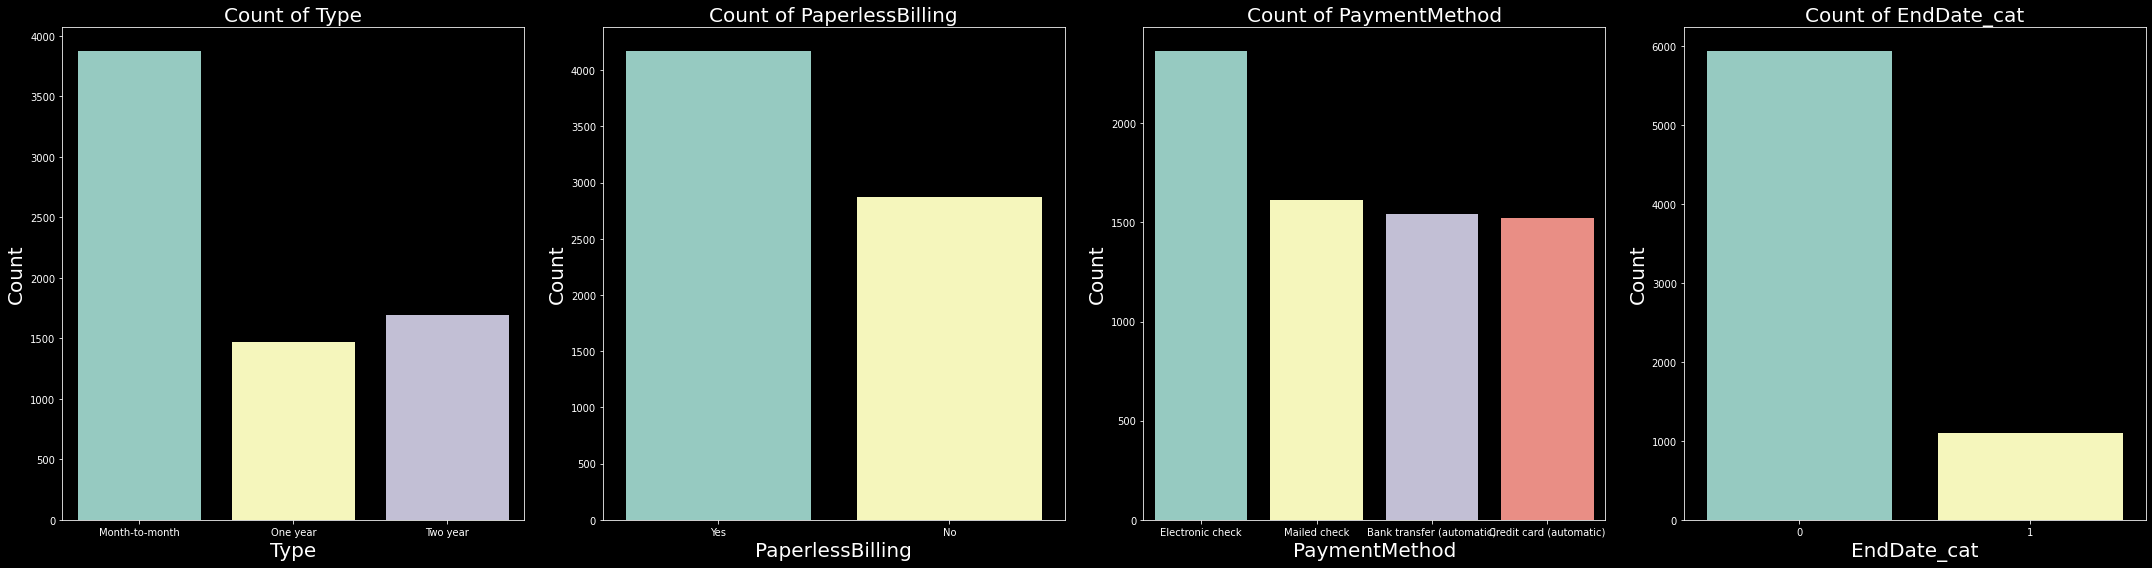

In [19]:
def create_plots3(data, features):
    fig, axes = plt.subplots(1, 4, figsize=(30,8))

    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Count of {feature}',fontsize=20)
        axes[i].set_xlabel(feature,fontsize=20)
        axes[i].set_ylabel('Count',fontsize=20)

    plt.tight_layout()
    plt.show()



features_to_plot3 = ['Type', 'PaperlessBilling',
                   'PaymentMethod', 'EndDate_cat',]
create_plots3(df_contract, features_to_plot3)

графики показывают что по количеству больше  контракты на месяц,тип платежа-электронный чек,электронный расчётный лист,и по данным мало оттока.

In [20]:
df_contract['EndDate'] = df_contract['EndDate'].replace('No', '2020-02-01')

df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])



df_contract['ContractDuration'] = (df_contract['EndDate'] - df_contract['BeginDate']).dt.days


In [21]:
#Код ментора
# df_contract['EndDate'] = df_contract['EndDate'].replace('No', '2020-02-01')
# df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])
# df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
# df_contract['ContractDuration'] = (df_contract['EndDate'] - df_contract['BeginDate']).dt.days

<div class="alert alert-danger">
<b>Комментарий ментора V2: &#10060; </b> Не совсем так, у тебя есть дата выгрузки - 1 февраля 2020, нужно No заменить на эту дату и посчитать длительность. Сейчас у тебя явно определяются оставшиеся клиенты(у них в ContractDuration нули), что является утечкой </div>

Получила новый признак "Длительность контракта". В признаке 0 означает, сто контракт действителен. 

In [22]:
df_contract['ContractDuration']

0         31
1       1036
2        123
3       1371
4        153
5        337
6        671
7        306
8        945
9        882
10       396
11       488
12      1767
13      1614
14       761
15       670
16      1584
17      2163
18       396
19       641
20        92
21       365
22        92
23      1767
24      1492
25       396
26      1523
27        92
28      2191
29       610
30      1706
31        62
32       822
33        31
34        31
35      1764
36       245
37      1401
38      1095
39       427
40       306
41      1948
42       518
43      1918
44       396
45      1492
46        62
47        92
48      1584
49      2102
50      1310
51       518
52       761
53       337
54      1826
55       580
56      1918
57      2010
58      1036
59      2191
60      1432
61      1246
62      2191
63       549
64       306
65        92
66      1432
67       945
68      1523
69       306
70        31
71      1584
72      1949
73      1888
74        92
75      1706
76      1401

In [23]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat,ContractDuration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


Поменяла 0 на "valid".

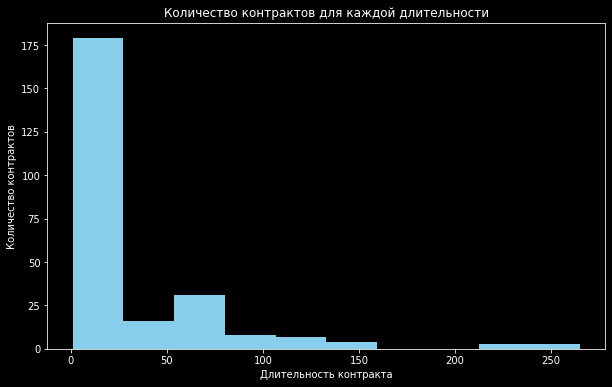

In [24]:
plt.figure(figsize=(10, 6))
df_contract['ContractDuration'].value_counts().plot(kind='hist', color='skyblue')
plt.xlabel('Длительность контракта')
plt.ylabel('Количество контрактов')
plt.title('Количество контрактов для каждой длительности')
plt.show()

In [25]:
df_contract.isna().mean()

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
EndDate_cat         0.000000
ContractDuration    0.000000
dtype: float64

In [26]:
#df_contract['EndDate'] = df_contract['EndDate'].replace(pd.NaT,'No')

In [27]:
#df_contract.isna().mean()

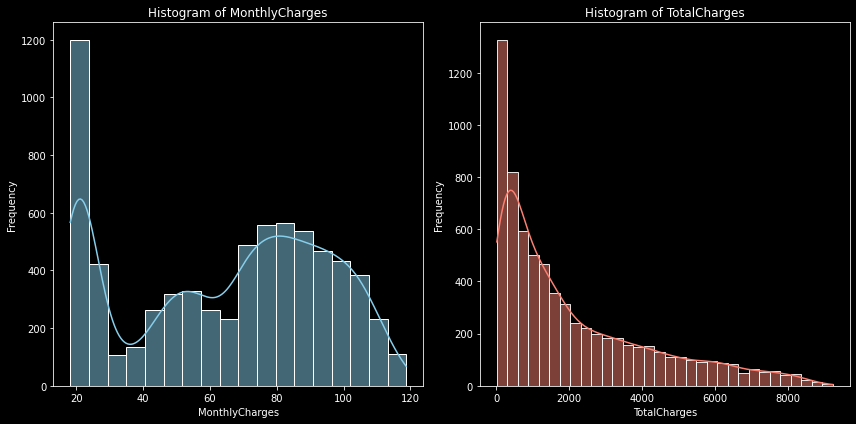

In [28]:
def create_histogram(data, feature1, feature2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(data[feature1], ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title(f'Histogram of {feature1}')
    axes[0].set_xlabel(feature1)
    axes[0].set_ylabel('Frequency')

    sns.histplot(data[feature2], ax=axes[1], kde=True, color='salmon')
    axes[1].set_title(f'Histogram of {feature2}')
    axes[1].set_xlabel(feature2)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

feature1 = 'MonthlyCharges'
feature2 = 'TotalCharges'
create_histogram(df_contract, feature1, feature2)

In [29]:
df_contract['TotalCharges'].describe()

count    7032.000000
mean     2118.621822
std      2112.736199
min        19.050000
25%       439.745000
50%      1345.275000
75%      3239.317500
max      9221.380000
Name: TotalCharges, dtype: float64

По месячным тратам большинство тратятся до 25-30, но есть ещё один пик в районе 50, 70-90. По общим тратам в райое 200.

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично! </div>

In [30]:
df_contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat',
       'ContractDuration'],
      dtype='object')

In [31]:
phik_columns = df_contract[['BeginDate','Type', 'PaperlessBilling',
                            'PaymentMethod', 'MonthlyCharges','TotalCharges',
                            'EndDate_cat','ContractDuration'
                            ]].copy()

In [32]:
phik_overview = phik_columns.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'EndDate_cat', 'ContractDuration'])

In [33]:
phik_overview['EndDate_cat'].sort_values(ascending=False)

EndDate_cat         1.000000
BeginDate           0.450254
ContractDuration    0.374569
TotalCharges        0.303758
MonthlyCharges      0.225925
PaymentMethod       0.214832
Type                0.094015
PaperlessBilling    0.083398
Name: EndDate_cat, dtype: float64

Проверим эту взаимосвязь с помощю сводных таблиц и визуализацию.

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Перед нами не стоит задача временных рядов, не стоит использовать временные признаки, лучше из дат начала и окончания контракта создать признак длительности контракта </div>

Проверим взоимосвязь начало контракта и траты за месяц и за год.

In [34]:
st = df_contract.groupby('ContractDuration')['TotalCharges'].agg(['count','mean']).sort_values(ascending=False,by='count')

In [35]:
st

,count,mean
ContractDuration,,
2191,265,6152.135547
153,249,310.399116
92,243,168.842058
31,236,39.576992
123,236,230.231441
62,225,109.712444
215,153,437.486144
184,147,345.429660
245,141,475.736525


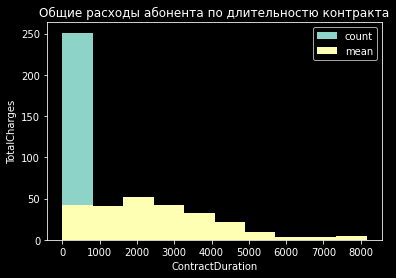

In [36]:
st.plot(kind='hist')
plt.xlabel('ContractDuration')
plt.ylabel('TotalCharges')
plt.title('Общие расходы абонента по длительностю контракта')
plt.show()

Группа клиентов с контрактом на 6 лет маленькая сравнить с клиентами действуюшими контрактами не логично.

In [37]:
sm = df_contract.groupby('ContractDuration')['MonthlyCharges'].agg(['count','mean']).sort_values(ascending=False,by='count')

In [38]:
sm

,count,mean
ContractDuration,,
2191,265,83.313585
153,249,60.444378
92,243,54.857407
31,236,38.572669
123,236,56.155085
62,225,53.375333
215,153,60.833333
184,147,55.860884
245,141,57.440426


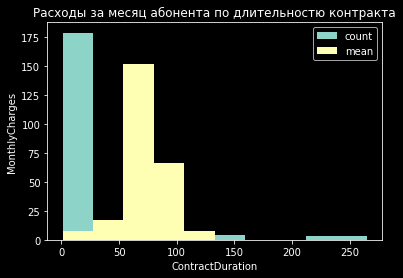

In [39]:
sm.plot(kind='hist')
plt.xlabel('ContractDuration')
plt.ylabel('MonthlyCharges')
plt.title('Расходы за месяц абонента по длительностю контракта')
plt.show()

Такая же ситуация тут.

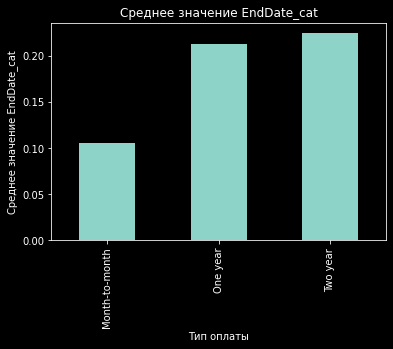

In [40]:
te = df_contract.groupby('Type')['EndDate_cat'].mean()

te.plot(kind='bar')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('Тип оплаты')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

In [41]:
ted = df_contract.groupby('Type')['EndDate_cat'].agg(['count','mean']).sort_values(ascending=False,
                                                                                                   by=['mean']).reset_index()

In [42]:
ted

,Type,count,mean
0,Two year,1695,0.224779
1,One year,1473,0.212492
2,Month-to-month,3875,0.105032


Если посмотреть на группы больше людей предпочитают контракт на месяц. Но больше оттока по среднему получается у людей с контрактом на двы года.

In [43]:
df_contract.groupby('PaperlessBilling')['EndDate_cat'].agg(['count','mean'])

,count,mean
PaperlessBilling,,
No,2872,0.132312
Yes,4171,0.172860


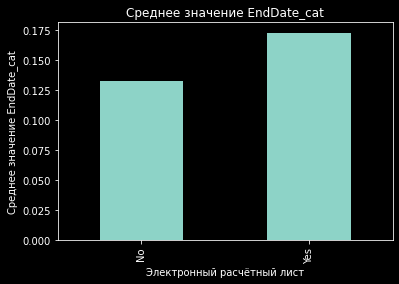

In [44]:
te = df_contract.groupby('PaperlessBilling')['EndDate_cat'].mean()

te.plot(kind='bar')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('Электронный расчётный лист')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

Как такого не вижу связи между этими признаками и по phik-у тоже нет такой сильной связи.

In [45]:
df_contract.groupby('PaymentMethod')['EndDate_cat'].agg(['count','mean'])

,count,mean
PaymentMethod,,
Bank transfer (automatic),1544,0.205311
Credit card (automatic),1522,0.208279
Electronic check,2365,0.147992
Mailed check,1612,0.072581


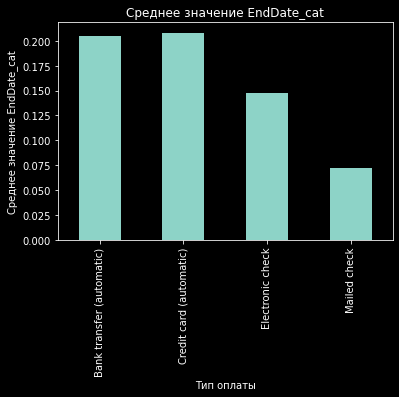

In [46]:
te = df_contract.groupby('PaymentMethod')['EndDate_cat'].mean()

te.plot(kind='bar')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('Тип оплаты')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

Ну  это связано с тем что большая группа людей предпочитают эти два типа  платежа. вот по этому по среднему там больше отточных клиентов

In [47]:
df_contract['MonthlyCharges_cut'] = pd.qcut(df_contract['MonthlyCharges'], 5)

In [48]:
print(df_contract['MonthlyCharges_cut'].unique())

[(25.05, 58.83], (58.83, 79.1], (94.25, 118.75], (79.1, 94.25], (18.249, 25.05]]
Categories (5, interval[float64]): [(18.249, 25.05] < (25.05, 58.83] < (58.83, 79.1] < (79.1, 94.25] < (94.25, 118.75]]


In [49]:
 df_contract.groupby('MonthlyCharges_cut',observed=True)['EndDate_cat'].agg(['count','mean'])

,count,mean
MonthlyCharges_cut,,
"(18.249, 25.05]",1420,0.097887
"(25.05, 58.83]",1397,0.109520
"(58.83, 79.1]",1411,0.126152
"(79.1, 94.25]",1407,0.181947
"(94.25, 118.75]",1408,0.266335


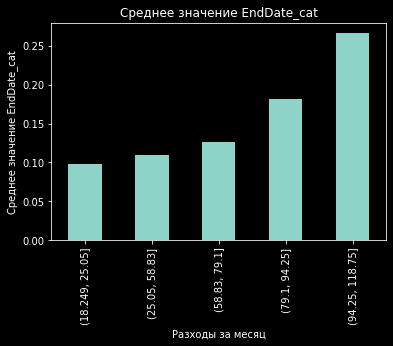

In [50]:
tec = df_contract.groupby('MonthlyCharges_cut',observed=True)['EndDate_cat'].mean()

tec.plot(kind='bar')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('Разходы за месяц')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

Разделила данные на равномощные интервалы по количеству элементов. 

In [51]:
me = df_contract.groupby('MonthlyCharges')['EndDate_cat'].agg(['count','mean'])

In [52]:
me

,count,mean
MonthlyCharges,,
18.25,1,0.000000
18.40,1,1.000000
18.55,1,0.000000
18.70,2,0.000000
18.75,1,0.000000
18.80,7,0.142857
18.85,5,0.200000
18.90,2,0.000000
18.95,6,0.000000


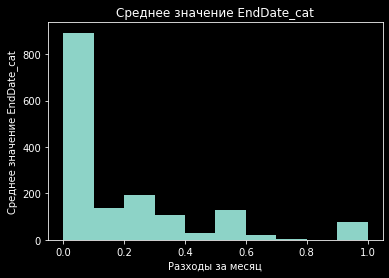

In [53]:
te = df_contract.groupby('MonthlyCharges')['EndDate_cat'].mean()

te.plot(kind='hist')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('Разходы за месяц')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

Тут выдим что среднее значение целевого признака выше у клиентов, у каторых не большие расходы.

## Вывод

Получила новый признак "Длительность контракта". В признаке 0 означает, сто контракт действителен.Поменяла 0 на "vaid".
После исл. анализа видно,что единственный признак каторый не сильно влияет на отток это 'электронный расчётный лист"

In [54]:
df_internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [55]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


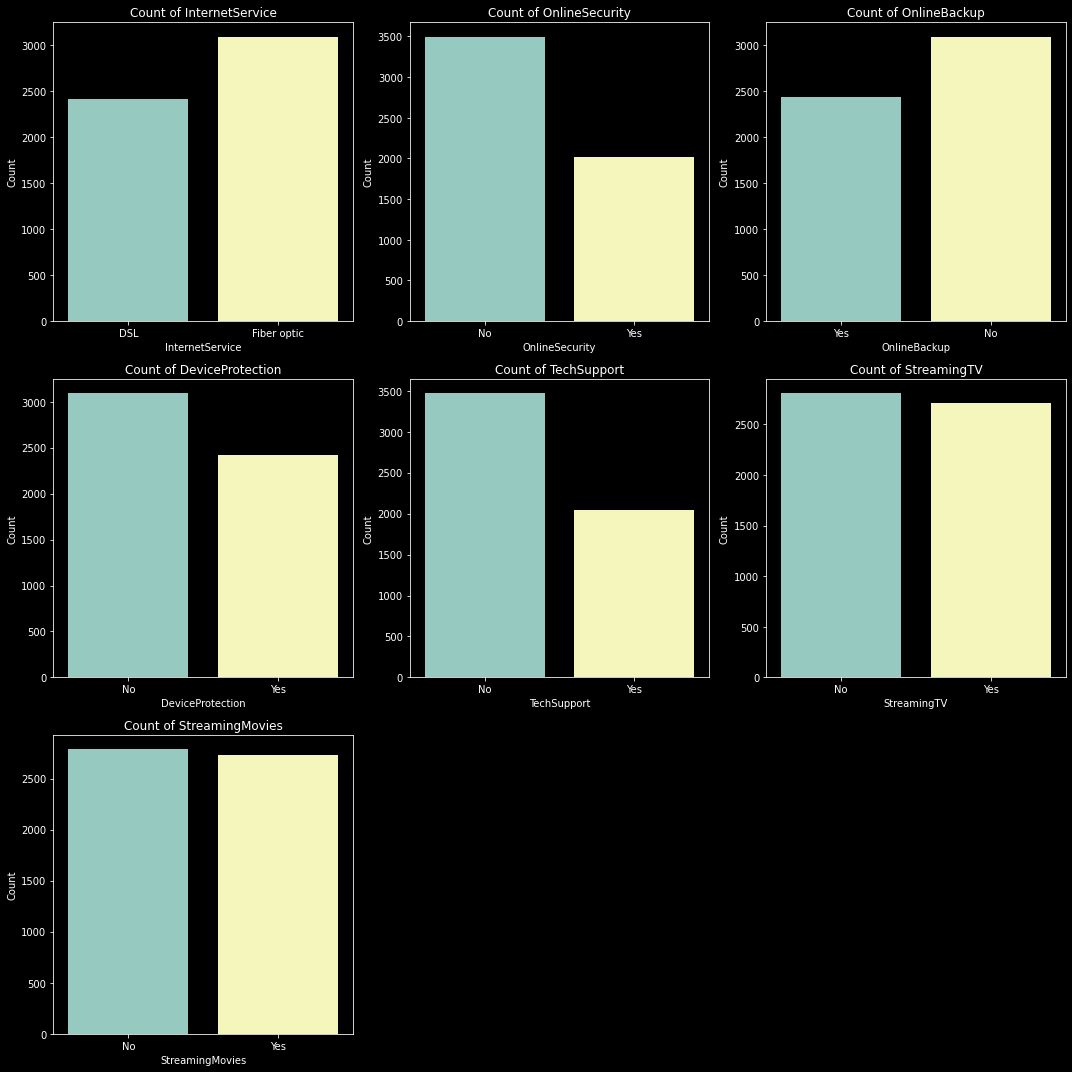

In [56]:
def create_plots(data, features):
    num_plots = len(features)
    num_cols = 3
    num_rows = -(-num_plots // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        sns.countplot(x=feature, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Count of {feature}')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Count')

    if num_plots % num_cols != 0:
        for j in range(num_plots % num_cols, num_cols):
            fig.delaxes(axes[row, j])

    plt.tight_layout()
    plt.show()

features_to_plot = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
create_plots(df_internet, features_to_plot)

Тут можно просто увидеть о предпочтениях клиентов. Не считая стриминговое тв и фильмы, они предпочитают контракты без добавочных услуг.

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично! </div>

In [57]:

df_internet_contracts = pd.merge(df_contract, df_internet, on='customerID', how='left')

if df_internet_contracts.isnull().values.any():
    print("Датасет содержит пропущенные значения после объединения.")
else:
    print("Пропущенных значений нет, датасет готов для исследовательского анализа.")


df_internet_contracts.sample(10)

Датасет содержит пропущенные значения после объединения.


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat,ContractDuration,MonthlyCharges_cut,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
503,7803-XOCCZ,2015-10-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),84.05,4370.60,0,1584,"(79.1, 94.25]",Fiber optic,Yes,No,Yes,Yes,No,No
5030,6101-IMRMM,2019-05-01,2020-02-01,Month-to-month,No,Mailed check,94.50,850.50,0,276,"(94.25, 118.75]",Fiber optic,No,No,Yes,No,Yes,Yes
5022,2599-CIPQE,2014-03-01,2020-02-01,Two year,No,Credit card (automatic),109.30,7760.30,0,2163,"(94.25, 118.75]",Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
6717,3768-NLUBH,2015-03-01,2015-09-01,Month-to-month,No,Electronic check,100.60,603.60,1,184,"(94.25, 118.75]",Fiber optic,No,No,Yes,No,Yes,Yes
1588,8152-UOBNY,2015-12-01,2020-02-01,One year,Yes,Electronic check,106.80,5446.80,0,1523,"(94.25, 118.75]",Fiber optic,No,Yes,No,Yes,Yes,Yes
1882,5832-EXGTT,2017-09-01,2020-02-01,Month-to-month,Yes,Mailed check,60.20,1815.63,0,883,"(58.83, 79.1]",DSL,Yes,No,No,No,No,Yes
2558,5380-XPJNZ,2016-12-01,2020-02-01,One year,No,Mailed check,20.05,784.76,0,1157,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,2977-CEBSX,2014-08-01,2020-02-01,Two year,Yes,Credit card (automatic),90.05,6181.03,0,2010,"(79.1, 94.25]",DSL,Yes,Yes,Yes,Yes,Yes,Yes
4105,5055-BRMNE,2014-07-01,2020-02-01,Two year,No,Credit card (automatic),106.70,7220.39,0,2041,"(94.25, 118.75]",Fiber optic,Yes,No,No,Yes,Yes,Yes
4409,5227-JSCFE,2014-03-01,2020-02-01,Two year,No,Credit card (automatic),46.35,3455.39,0,2163,"(25.05, 58.83]",DSL,Yes,Yes,Yes,Yes,No,No


In [58]:
len(df_contract)

7043

In [59]:
len(df_internet_contracts)

7043

In [60]:
df_internet_contracts.isna().mean()

customerID            0.000000
BeginDate             0.000000
EndDate               0.000000
Type                  0.000000
PaperlessBilling      0.000000
PaymentMethod         0.000000
MonthlyCharges        0.000000
TotalCharges          0.001562
EndDate_cat           0.000000
ContractDuration      0.000000
MonthlyCharges_cut    0.000000
InternetService       0.216669
OnlineSecurity        0.216669
OnlineBackup          0.216669
DeviceProtection      0.216669
TechSupport           0.216669
StreamingTV           0.216669
StreamingMovies       0.216669
dtype: float64

In [61]:
dup_sum(df_internet_contracts)

0

In [62]:
rows_with_na = df_internet_contracts[df_internet_contracts.isnull().any(axis=1)]
print("Строки с пропусками:")
display(rows_with_na)

Строки с пропусками:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat,ContractDuration,MonthlyCharges_cut,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
11,7469-LKBCI,2018-10-01,2020-02-01,Two year,No,Credit card (automatic),18.95,312.30,0,488,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8191-XWSZG,2015-10-01,2020-02-01,One year,No,Mailed check,20.65,1106.01,0,1584,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1680-VDCWW,2019-02-01,2020-02-01,One year,No,Bank transfer (automatic),19.80,237.60,0,365,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1066-JKSGK,2019-11-01,2020-02-01,Month-to-month,No,Mailed check,20.15,61.05,0,92,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,7310-EGVHZ,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),20.20,22.22,0,31,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,9867-JCZSP,2018-09-01,2020-02-01,One year,No,Mailed check,20.75,352.75,0,518,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,3957-SQXML,2017-04-01,2020-02-01,Two year,No,Credit card (automatic),24.95,890.72,0,1036,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,3170-NMYVV,2015-12-01,2020-02-01,Two year,No,Bank transfer (automatic),20.15,1007.50,0,1523,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0731-EBJQB,2015-10-01,2020-02-01,One year,Yes,Electronic check,20.40,1060.80,0,1584,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,8028-PNXHQ,2014-12-01,2020-02-01,Two year,Yes,Bank transfer (automatic),24.25,1503.50,0,1888,"(18.249, 25.05]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
imputer = SimpleImputer(strategy='constant', fill_value=0)

df_internet_contracts['TotalCharges'] = imputer.fit_transform(df_internet_contracts[['TotalCharges']])

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> В данном случае заполнение пропуска медианными значениями некорректно, это новые клиенты </div>

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично </div>

In [64]:
columns_to_impute = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies']

imputer = SimpleImputer(strategy='most_frequent')
df_internet_contracts[columns_to_impute] = imputer.fit_transform(df_internet_contracts[columns_to_impute])

In [65]:
df_internet_contracts.isna().mean()

customerID            0.0
BeginDate             0.0
EndDate               0.0
Type                  0.0
PaperlessBilling      0.0
PaymentMethod         0.0
MonthlyCharges        0.0
TotalCharges          0.0
EndDate_cat           0.0
ContractDuration      0.0
MonthlyCharges_cut    0.0
InternetService       0.0
OnlineSecurity        0.0
OnlineBackup          0.0
DeviceProtection      0.0
TechSupport           0.0
StreamingTV           0.0
StreamingMovies       0.0
dtype: float64

In [66]:
df_internet_contracts.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat',
       'ContractDuration', 'MonthlyCharges_cut', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [67]:
df_internet_contracts.groupby('InternetService',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
InternetService,,
DSL,2421,0.142916
Fiber optic,4622,0.163349


In [68]:
df_internet_contracts.groupby('OnlineSecurity',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
OnlineSecurity,,
No,5024,0.136545
Yes,2019,0.205547


In [69]:
df_internet_contracts.groupby('OnlineBackup',dropna=False)['EndDate_cat'].agg(['count',
                                                                               'mean']).sort_values(ascending=False,by='count')

,count,mean
OnlineBackup,,
No,4614,0.117252
Yes,2429,0.230548


In [70]:
df_internet_contracts.groupby('DeviceProtection',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
DeviceProtection,,
No,4621,0.119238
Yes,2422,0.227085


In [71]:
df_internet_contracts.groupby('TechSupport',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
TechSupport,,
No,4999,0.140628
Yes,2044,0.194716


In [72]:
df_internet_contracts.groupby('StreamingTV',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
StreamingTV,,
No,4336,0.119234
Yes,2707,0.215737


In [73]:
df_internet_contracts.groupby('StreamingMovies',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
StreamingMovies,,
No,4311,0.114823
Yes,2732,0.221816


In [74]:
def plot_mean_for_feature(df, feature, target_col):
    group_stats = df.groupby(feature, dropna=False)[target_col].agg(['count', 'mean'])
    ax = group_stats['mean'].plot(kind='bar')
    plt.title('Среднее значение ' + target_col + ' по ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Среднее значение ' + target_col)
    plt.show()

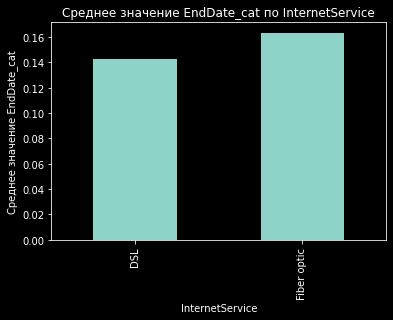

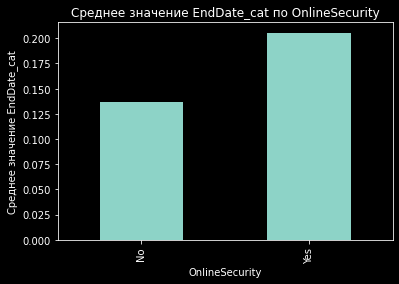

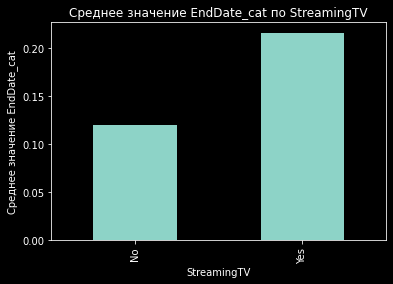

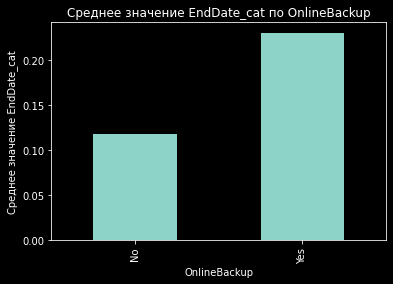

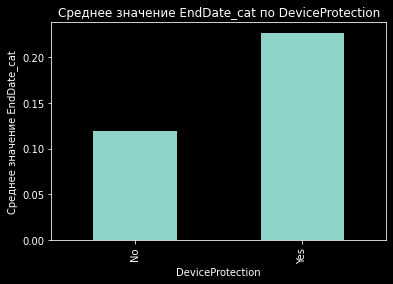

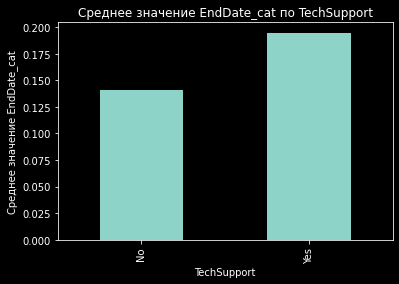

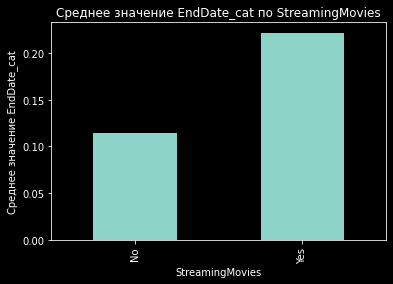

In [75]:
plot_mean_for_feature(df_internet_contracts, 'InternetService', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'OnlineSecurity', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'StreamingTV', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'OnlineBackup', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'DeviceProtection', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'TechSupport', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts, 'StreamingMovies', 'EndDate_cat')

## Вывод

В большинстве случаев люди отказываются от добавочных услуг. И группы "отказников" получается больше. И по этому среднее оттока больше в этих группах. Но и немальенкое среднее оттока в группе клиентлов, каторые пользуются доп.услугами. 

В столбце TotalCharges  заполнила пропуски 0-ом, по скольку это новые клиенты.
В остальных столбцах заполнила наиболее часто встречающимся значением в столбце.

In [76]:
df_personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [77]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [78]:
df_personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
3186,3457-PQBYH,Female,0,Yes,Yes
1690,5740-YHGTW,Male,0,Yes,Yes
1727,5136-RGMZO,Male,0,No,No
3827,6870-ECSHE,Female,0,No,No
4985,4827-DPADN,Female,0,Yes,Yes


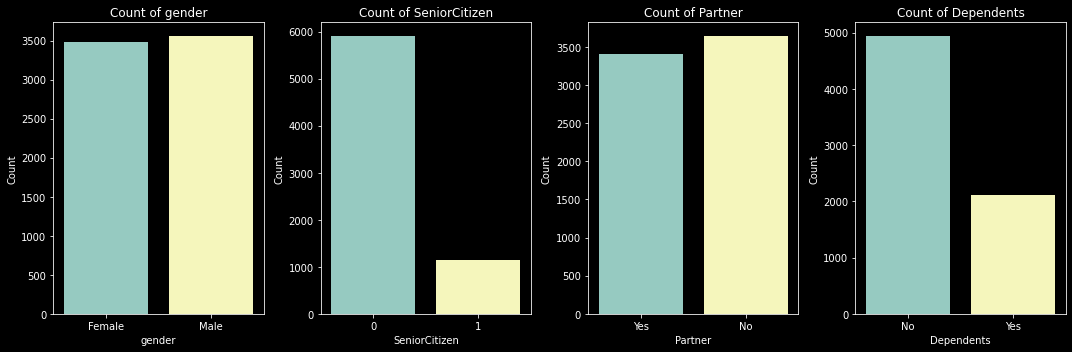

In [79]:
def create_plots2(data, features):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    for i, feature in enumerate(features):
        sns.countplot(x=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Count of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()



features_to_plot2 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
create_plots2(df_personal, features_to_plot2)

Так по графикам пока ничего заметного не скажешь.Нужно соединить с целевым признаком и понять есть ли взаимосвязь между ними.

In [80]:
df_internet_contracts_personal = pd.merge(df_internet_contracts, df_personal, on='customerID', how='left')

if df_internet_contracts_personal.isnull().values.any():
    print("Датасет содержит пропущенные значения после объединения.")
else:
    print("Пропущенных значений нет, датасет готов для исследовательского анализа.")


df_internet_contracts_personal.head(10)

Пропущенных значений нет, датасет готов для исследовательского анализа.


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat,ContractDuration,MonthlyCharges_cut,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,"(25.05, 58.83]",DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,"(25.05, 58.83]",DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,"(25.05, 58.83]",DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,"(25.05, 58.83]",DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,"(58.83, 79.1]",Fiber optic,No,No,No,No,No,No,Female,0,No,No
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337,"(94.25, 118.75]",Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671,"(79.1, 94.25]",Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0,306,"(25.05, 58.83]",DSL,Yes,No,No,No,No,No,Female,0,No,No
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945,"(94.25, 118.75]",Fiber optic,No,No,Yes,Yes,Yes,Yes,Female,0,Yes,No
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1,882,"(25.05, 58.83]",DSL,Yes,Yes,No,No,No,No,Male,0,No,Yes


In [81]:
df_internet_contracts_personal.isna().mean()

customerID            0.0
BeginDate             0.0
EndDate               0.0
Type                  0.0
PaperlessBilling      0.0
PaymentMethod         0.0
MonthlyCharges        0.0
TotalCharges          0.0
EndDate_cat           0.0
ContractDuration      0.0
MonthlyCharges_cut    0.0
InternetService       0.0
OnlineSecurity        0.0
OnlineBackup          0.0
DeviceProtection      0.0
TechSupport           0.0
StreamingTV           0.0
StreamingMovies       0.0
gender                0.0
SeniorCitizen         0.0
Partner               0.0
Dependents            0.0
dtype: float64

In [82]:
len(df_internet_contracts_personal)

7043

In [83]:
dup_sum(df_internet_contracts_personal)

0

In [84]:
df_internet_contracts_personal.groupby('gender',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
gender,,
Female,3488,0.151376
Male,3555,0.161181


In [85]:
def custom_aggregate(df, groupby_cols, target_col):
    result = df.groupby(groupby_cols, dropna=False)[target_col].agg(['count','mean'])
    return result

input_cols = ['gender','EndDate_cat']
target_col = 'EndDate_cat'
result = custom_aggregate(df=df_internet_contracts_personal, groupby_cols=input_cols, target_col=target_col)

display(result)

count  mean
gender EndDate_cat             
Female 0             2960     0
       1              528     1
Male   0             2982     0
       1              573     1

Разница по оттоку  небольшая.

In [86]:
df_internet_contracts_personal.groupby('SeniorCitizen',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
SeniorCitizen,,
0,5901,0.147263
1,1142,0.203152


In [87]:
input_cols = ['SeniorCitizen','EndDate_cat']
target_col = 'EndDate_cat'
result = custom_aggregate(df=df_internet_contracts_personal, groupby_cols=input_cols, target_col=target_col)

display(result)

count  mean
SeniorCitizen EndDate_cat             
0             0             5032     0
              1              869     1
1             0              910     0
              1              232     1

Тут сравнить не правильно, по скольку группа пенсионеров маленькая.и выходит что средняя по оттоку в этой группе больше.

In [88]:
df_internet_contracts_personal.groupby('Partner',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
Partner,,
No,3641,0.104916
Yes,3402,0.211346


In [89]:
input_cols = ['Partner','EndDate_cat']
target_col = 'EndDate_cat'
result = custom_aggregate(df=df_internet_contracts_personal, groupby_cols=input_cols, target_col=target_col)

display(result)

count  mean
Partner EndDate_cat             
No      0             3259     0
        1              382     1
Yes     0             2683     0
        1              719     1

Тут можно сказать, что отток у клиентов с парами больше. и по phik-у тоже была взаимосвязь. Скорее всего это важный признак.

In [90]:
df_internet_contracts_personal.groupby('Dependents',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
Dependents,,
No,4933,0.148591
Yes,2110,0.174408


In [91]:
input_cols = ['Dependents','EndDate_cat']
target_col = 'EndDate_cat'
result = custom_aggregate(df=df_internet_contracts_personal, groupby_cols=input_cols, target_col=target_col)

display(result)

count  mean
Dependents EndDate_cat             
No         0             4200     0
           1              733     1
Yes        0             1742     0
           1              368     1

Так же сравнить не правильно группы не равные.

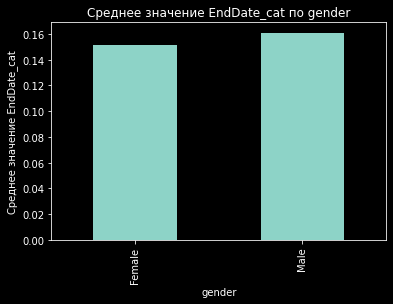

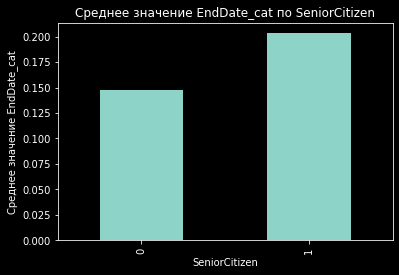

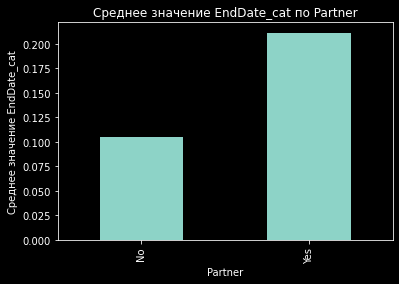

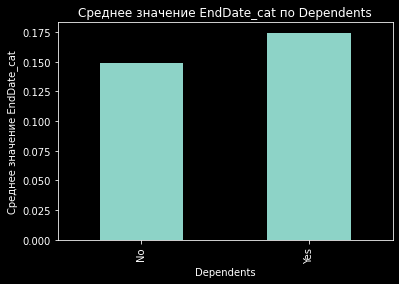

In [92]:
plot_mean_for_feature(df_internet_contracts_personal, 'gender', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts_personal, 'SeniorCitizen', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts_personal, 'Partner', 'EndDate_cat')
plot_mean_for_feature(df_internet_contracts_personal, 'Dependents', 'EndDate_cat')

## Вывод

После исследования видно что важную роль играет признак " есть ли у абонента супруг или супруга". По среднему целевого признака больше оттока есть у клиентов с парами.

In [93]:
df_phone.sample(5)

,customerID,MultipleLines
1614,3055-VTCGS,No
118,2372-HWUHI,No
5773,1293-BSEUN,No
2210,2450-ZKEED,No
2649,1658-TJVOA,No


In [94]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


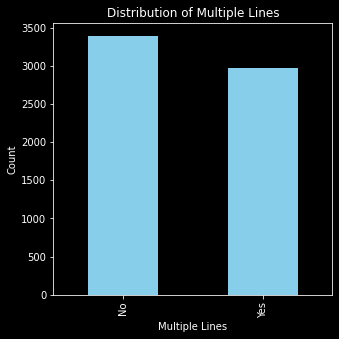

In [95]:
value_counts = df_phone['MultipleLines'].value_counts()

plt.figure(figsize=(5,5))
value_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.title('Distribution of Multiple Lines')

plt.show()

In [96]:
df_internet_contracts_personal_phone = pd.merge(df_internet_contracts_personal, df_phone, on='customerID', how='left')

if df_internet_contracts_personal_phone.isnull().values.any():
    print("Датасет содержит пропущенные значения после объединения.")
else:
    print("Пропущенных значений нет, датасет готов для исследовательского анализа.")


df_internet_contracts_personal_phone.head(10)

Датасет содержит пропущенные значения после объединения.


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,EndDate_cat,ContractDuration,MonthlyCharges_cut,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,"(25.05, 58.83]",DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,"(25.05, 58.83]",DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,"(25.05, 58.83]",DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,"(25.05, 58.83]",DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,"(58.83, 79.1]",Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0,337,"(94.25, 118.75]",Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No,Yes
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0,671,"(79.1, 94.25]",Fiber optic,No,Yes,No,No,Yes,No,Male,0,No,Yes,Yes
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0,306,"(25.05, 58.83]",DSL,Yes,No,No,No,No,No,Female,0,No,No,NaN
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0,945,"(94.25, 118.75]",Fiber optic,No,No,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1,882,"(25.05, 58.83]",DSL,Yes,Yes,No,No,No,No,Male,0,No,Yes,No


In [97]:
df_internet_contracts_personal_phone.isna().mean()

customerID            0.000000
BeginDate             0.000000
EndDate               0.000000
Type                  0.000000
PaperlessBilling      0.000000
PaymentMethod         0.000000
MonthlyCharges        0.000000
TotalCharges          0.000000
EndDate_cat           0.000000
ContractDuration      0.000000
MonthlyCharges_cut    0.000000
InternetService       0.000000
OnlineSecurity        0.000000
OnlineBackup          0.000000
DeviceProtection      0.000000
TechSupport           0.000000
StreamingTV           0.000000
StreamingMovies       0.000000
gender                0.000000
SeniorCitizen         0.000000
Partner               0.000000
Dependents            0.000000
MultipleLines         0.096834
dtype: float64

In [98]:
len(df_internet_contracts_personal_phone)

7043

In [99]:
dup_sum(df_internet_contracts_personal_phone)

0

In [100]:
df_internet_contracts_personal_phone.groupby('MultipleLines',dropna=False)['EndDate_cat'].agg(['count','mean'])

,count,mean
MultipleLines,,
No,3390,0.094395
Yes,2971,0.228206
NaN,682,0.151026


In [101]:
columns_to_impute = ['MultipleLines']

imputer = SimpleImputer(strategy='most_frequent')
df_internet_contracts_personal_phone[columns_to_impute] = imputer.fit_transform(df_internet_contracts_personal_phone[columns_to_impute])

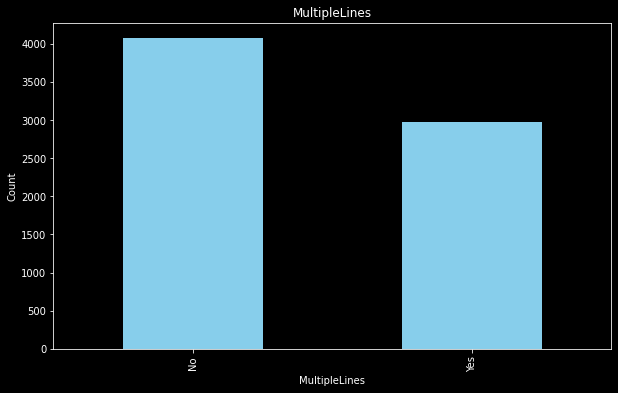

In [102]:
plt.figure(figsize=(10, 6))
df_internet_contracts_personal_phone['MultipleLines'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.title('MultipleLines')
plt.show()

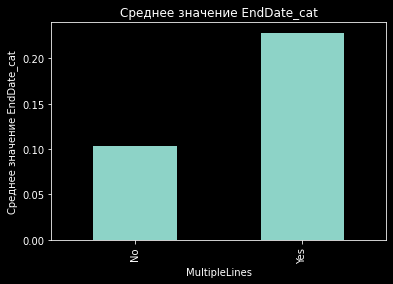

In [103]:
med = df_internet_contracts_personal_phone.groupby('MultipleLines',dropna=False)['EndDate_cat'].mean()
med.plot(kind='bar')
plt.title('Среднее значение EndDate_cat')
plt.xlabel('MultipleLines')
plt.ylabel('Среднее значение EndDate_cat')
plt.show()

In [104]:
df_internet_contracts_personal_phone.isna().mean()

customerID            0.0
BeginDate             0.0
EndDate               0.0
Type                  0.0
PaperlessBilling      0.0
PaymentMethod         0.0
MonthlyCharges        0.0
TotalCharges          0.0
EndDate_cat           0.0
ContractDuration      0.0
MonthlyCharges_cut    0.0
InternetService       0.0
OnlineSecurity        0.0
OnlineBackup          0.0
DeviceProtection      0.0
TechSupport           0.0
StreamingTV           0.0
StreamingMovies       0.0
gender                0.0
SeniorCitizen         0.0
Partner               0.0
Dependents            0.0
MultipleLines         0.0
dtype: float64

In [105]:
df_internet_contracts_personal_phone.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat',
       'ContractDuration', 'MonthlyCharges_cut', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [106]:
phik_columns = df_internet_contracts_personal_phone[[ 'Type', 'PaperlessBilling',
                                                    'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat',
                                                    'ContractDuration', 'MonthlyCharges_cut', 'InternetService',
                                                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                                    'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
                                                    'Dependents', 'MultipleLines']].copy()

In [107]:
phik_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Type                7043 non-null   object  
 1   PaperlessBilling    7043 non-null   object  
 2   PaymentMethod       7043 non-null   object  
 3   MonthlyCharges      7043 non-null   float64 
 4   TotalCharges        7043 non-null   float64 
 5   EndDate_cat         7043 non-null   int64   
 6   ContractDuration    7043 non-null   int64   
 7   MonthlyCharges_cut  7043 non-null   category
 8   InternetService     7043 non-null   object  
 9   OnlineSecurity      7043 non-null   object  
 10  OnlineBackup        7043 non-null   object  
 11  DeviceProtection    7043 non-null   object  
 12  TechSupport         7043 non-null   object  
 13  StreamingTV         7043 non-null   object  
 14  StreamingMovies     7043 non-null   object  
 15  gender              7043 non-null   ob

In [108]:
phik_overview = phik_columns.phik_matrix(interval_cols = ['MonthlyCharges', 'TotalCharges', 'EndDate_cat','ContractDuration'])

In [109]:
phik_overview['EndDate_cat'].sort_values(ascending=False)

EndDate_cat           1.000000
ContractDuration      0.374569
TotalCharges          0.302890
MultipleLines         0.261237
OnlineBackup          0.229482
Partner               0.226688
MonthlyCharges        0.225925
StreamingMovies       0.222232
DeviceProtection      0.218380
PaymentMethod         0.214832
StreamingTV           0.200198
MonthlyCharges_cut    0.138471
OnlineSecurity        0.132594
TechSupport           0.103652
Type                  0.094015
SeniorCitizen         0.086159
PaperlessBilling      0.083398
Dependents            0.046871
InternetService       0.036843
gender                0.008581
Name: EndDate_cat, dtype: float64

In [110]:
phik_overview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Type to MultipleLines
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                20 non-null     float64
 1   PaperlessBilling    20 non-null     float64
 2   PaymentMethod       20 non-null     float64
 3   MonthlyCharges      20 non-null     float64
 4   TotalCharges        20 non-null     float64
 5   EndDate_cat         20 non-null     float64
 6   ContractDuration    20 non-null     float64
 7   MonthlyCharges_cut  20 non-null     float64
 8   InternetService     20 non-null     float64
 9   OnlineSecurity      20 non-null     float64
 10  OnlineBackup        20 non-null     float64
 11  DeviceProtection    20 non-null     float64
 12  TechSupport         20 non-null     float64
 13  StreamingTV         20 non-null     float64
 14  StreamingMovies     20 non-null     float64
 15  gender              20 non-null     float64
 16  S

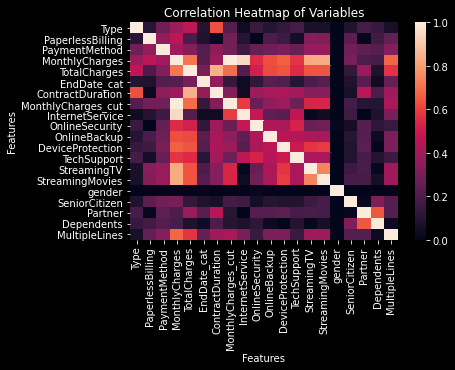

In [111]:
sns.heatmap(phik_overview)
plt.title("Correlation Heatmap of Variables")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

#  Подготовка данных

In [112]:
df_internet_contracts_personal_phone.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat',
       'ContractDuration', 'MonthlyCharges_cut', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')

In [113]:
df_ml = df_internet_contracts_personal_phone[['Type', 'PaperlessBilling','PaymentMethod',
                                              'ContractDuration','MonthlyCharges', 'TotalCharges', 'EndDate_cat',
                                              'InternetService', 'OnlineSecurity','OnlineBackup',
                                              'DeviceProtection','TechSupport', 'StreamingTV',
                                              'StreamingMovies', 'gender','SeniorCitizen',
                                              'Partner', 'Dependents', 'MultipleLines']].copy()

In [114]:
df_ml.sample(10)

,Type,PaperlessBilling,PaymentMethod,ContractDuration,MonthlyCharges,TotalCharges,EndDate_cat,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
4675,One year,Yes,Electronic check,1095,100.00,3600.00,1,Fiber optic,No,No,No,Yes,Yes,Yes,Male,0,No,No,Yes
3534,One year,Yes,Bank transfer (automatic),1461,105.20,5251.58,0,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Female,0,No,Yes,No
2131,Two year,No,Credit card (automatic),1279,48.15,2143.64,0,DSL,Yes,No,Yes,Yes,Yes,No,Male,0,Yes,Yes,No
316,Two year,Yes,Credit card (automatic),2163,19.90,1412.90,0,Fiber optic,No,No,No,No,No,No,Male,0,No,No,No
5449,Two year,No,Bank transfer (automatic),2041,103.15,6911.05,0,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,No
4793,One year,Yes,Credit card (automatic),1492,99.25,4863.25,0,Fiber optic,No,No,Yes,Yes,Yes,Yes,Male,0,Yes,No,No
4198,Two year,No,Mailed check,1584,23.05,1270.52,0,Fiber optic,No,No,No,No,No,No,Female,0,Yes,Yes,Yes
3552,Two year,Yes,Bank transfer (automatic),945,102.10,3228.40,1,Fiber optic,Yes,Yes,Yes,No,No,Yes,Male,0,No,No,Yes
2601,Two year,Yes,Bank transfer (automatic),2191,98.65,7315.88,0,Fiber optic,No,Yes,Yes,Yes,No,Yes,Female,0,Yes,Yes,Yes
6536,Month-to-month,No,Mailed check,31,24.40,24.40,0,DSL,No,No,No,No,No,No,Male,0,No,No,No


In [115]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   ContractDuration  7043 non-null   int64  
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   EndDate_cat       7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  gender            7043 non-null   object 
 15  SeniorCitizen     7043 non-null   int64  
 16  Partner           7043 non-null   object 


In [116]:
df_ml['SeniorCitizen'] = df_ml['SeniorCitizen'].astype(str)

In [117]:
phik_overview2 = df_ml.phik_matrix(interval_cols=['ContractDuration', 'MonthlyCharges', 'TotalCharges', 'EndDate_cat'])

In [118]:
phik_overview2['EndDate_cat'].sort_values(ascending=False)

EndDate_cat         1.000000
ContractDuration    0.374569
TotalCharges        0.302890
MultipleLines       0.261237
OnlineBackup        0.229482
Partner             0.226688
MonthlyCharges      0.225925
StreamingMovies     0.222232
DeviceProtection    0.218380
PaymentMethod       0.214832
StreamingTV         0.200198
OnlineSecurity      0.132594
TechSupport         0.103652
Type                0.094015
SeniorCitizen       0.086159
PaperlessBilling    0.083398
Dependents          0.046871
InternetService     0.036843
gender              0.008581
Name: EndDate_cat, dtype: float64

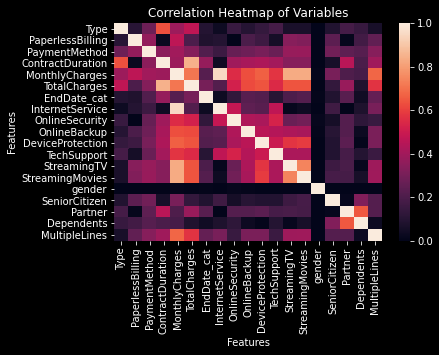

In [119]:
sns.heatmap(phik_overview2)
plt.title("Correlation Heatmap of Variables")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()  

In [120]:
df_ml.isna().mean()

Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
ContractDuration    0.0
MonthlyCharges      0.0
TotalCharges        0.0
EndDate_cat         0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
dtype: float64

In [121]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   ContractDuration  7043 non-null   int64  
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   EndDate_cat       7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  gender            7043 non-null   object 
 15  SeniorCitizen     7043 non-null   object 
 16  Partner           7043 non-null   object 


In [122]:
X = df_ml.drop('EndDate_cat', axis=1)
y = df_ml['EndDate_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

In [123]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5282, 18), (1761, 18), (5282,), (1761,))

In [124]:
df_test = X_test

In [125]:
ohe_columns = [
    'Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines'
]

In [126]:
num_columns = ['MonthlyCharges', 'TotalCharges','ContractDuration']

In [127]:
ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)],
    remainder='passthrough'
)

In [128]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(8, 10),
        'models__max_features': range(8, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 150],
        'models__max_depth': range(8, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)],
        'models__iterations': [50, 100, 150],
        'models__depth': range(4, 8),
        'models__learning_rate':[0.01, 0.02, 0.03, 0.05],
        'models__auto_class_weights':['Balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

param_grid

[{'models': [DecisionTreeClassifier(random_state=60524)],
  'models__max_depth': range(8, 10),
  'models__max_features': range(8, 10),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [KNeighborsClassifier()],
  'models__n_neighbors': range(2, 5),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [LogisticRegression(penalty='l1', random_state=60524, solver='liblinear')],
  'models__C': range(1, 5),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [RandomForestClassifier(random_state=60524)],
  'models__n_estimators': [50, 100, 150],
  'models__max_depth': range(8, 10),
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
 {'models': [<catboost.core.CatBoostClassifier at 0x7f0b535650a0>],
  'models__iterations': [50, 100, 150],
  'models__depth': range(4, 8),
  'models__learning_rate': [0.01, 0.02, 0.03, 0.05],
  'models__auto_class_weights': ['Balanced'

In [129]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies', 'gender',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines']),
                                                 ('num', MinMaxScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'ContractDuration'])])),
                ('models', DecisionTreeClassifier(random_state=60524))])

In [130]:
randomized_search = RandomizedSearchCV(pipe_final, param_grid, cv=5, scoring='roc_auc', random_state=RANDOM_STATE, n_jobs=-1)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)



Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                    

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Обрати внимание, что в численные признаки попал SeniorCitizen(он по сути является категориальным). Также вылетала ошибка из-за sparse_output </div>

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Максимизировать необходимо roc_auc,а не accuracy </div>

In [131]:
best_model = randomized_search.best_estimator_
catboost_model = best_model.named_steps['models']
catboost_model

In [132]:
display(catboost_model.get_params())

{'iterations': 100,
 'learning_rate': 0.05,
 'depth': 6,
 'verbose': 0,
 'auto_class_weights': 'Balanced',
 'random_state': 60524}

Подгатовила данные для пайплайна. В пайплайне использовала пять моделей DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression
 и RandomForestClassifier, CatBoostClassifier. Использовала randomized_search с метрикой roc_auc. На трен данных лучшая модель - CatBoostClassifier, метрика roc_auc  получила 0.82. Модель сохранила в переменной catboost_model.

In [133]:
X_train = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test = best_model.named_steps['preprocessor'].transform(X_test)

In [134]:
predicted_probabilities = catboost_model.predict_proba(X_test)
predict_proba = predicted_probabilities[:, 1]

predict_proba

array([0.72388723, 0.64401261, 0.86976067, ..., 0.12795472, 0.37511137,
       0.21865656])

In [135]:
len(predict_proba)

1761

In [136]:
predict = catboost_model.predict(X_test)

In [137]:
predict

array([1, 1, 1, ..., 0, 0, 0])

In [138]:
len(predict)

1761

In [139]:
roc_auc_proba = roc_auc_score(y_test,predict_proba)
acc = accuracy_score(y_test,predict)
recall = recall_score(y_test,predict, average="binary",pos_label=1)
precision = precision_score(y_test,predict,pos_label=1)
f1 = f1_score(y_test,predict)
display(round(roc_auc_proba,2))
display(round(acc,2))
display(round(recall,2))
display(round(precision,2))
display(round(f1,2))

0.85

0.76

0.8

0.37

0.51

На тестовой выборке roc_auc-0.85. Тут нам важен recall, по скольку нам важно что бы модель правильно угадала отточного клиента. У модели recall-0.8.

<div class="alert alert-info">
    <b> У меня такое впечетление, что модель переобучился. Я попробовала обучить модель без признака ContractDuration. И лучшей моделью стал RandomForrest, roc_auc = 0.88.
И плюс есть мультиколлинеарность между признаками MonthlyCharges - StreamingMovies,StreamingTV,InternetService. Но даже при этом,если я не ошибаюсь,penalty='l1' делает модель менее чувствительным при мультиколлинеарностьи.</div>
    

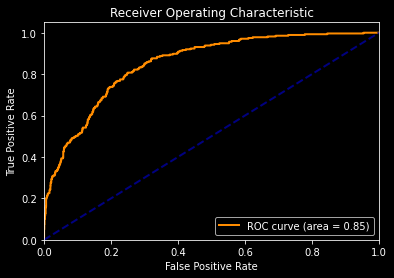

In [140]:
fpr, tpr, thresholds = roc_curve(y_test,predict_proba)
roc_auc = roc_auc_score(y_test,predict_proba)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [141]:
cm = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1120  366]
 [  56  219]]


In [142]:
tn, fp, fn, tp = confusion_matrix(y_test,predict).ravel()

In [143]:
tn, fp, fn, tp 

(1120, 366, 56, 219)

Ложно отрицательных ответов - 56.

In [144]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [145]:
dummy_clf.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [146]:
dummy_pred = dummy_clf.predict(X_test)

In [147]:
dummy_clf.score(X_test, y_test)

0.8438387279954571

In [148]:
acc_dummy = roc_auc_score(y_test,dummy_pred)
round(acc_dummy,2)

0.5

In [150]:
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

In [151]:
features_out = best_model.named_steps['preprocessor'].transformers_[0][1][0].get_feature_names_out().tolist()+num_columns

In [152]:
features_out

['Type_One year',
 'Type_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_Yes',
 'MonthlyCharges',
 'TotalCharges',
 'ContractDuration']

In [153]:
catboost_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,20,33.922461
1,1,10.165956
2,19,9.444224
3,18,7.483334
4,17,6.497871
5,15,4.788613
6,8,3.749969
7,0,3.506100
8,5,3.230629
9,16,2.106194


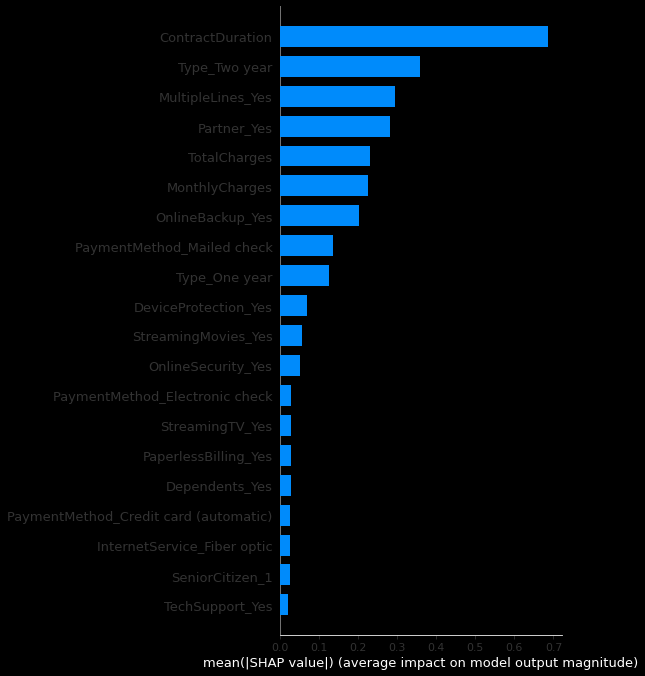

In [154]:
shap.summary_plot(shap_values, X_test,plot_type="bar",feature_names=features_out)

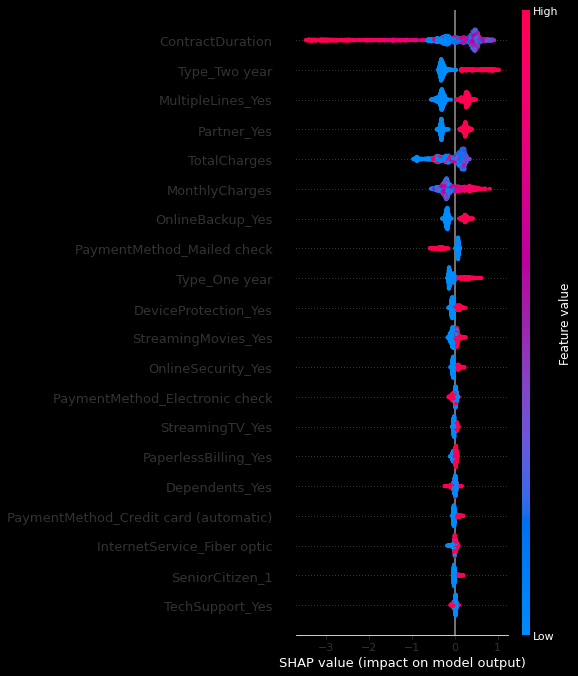

In [155]:
shap.summary_plot(shap_values, X_test,feature_names=features_out)

Первое место по важности у нового признака  "Длительность контракта".

In [156]:
df_test['predict_proba'] = predict_proba

In [157]:
df_test['prediction'] = predict

In [158]:
df_test.sample(10)

,Type,PaperlessBilling,PaymentMethod,ContractDuration,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,predict_proba,prediction
4345,One year,Yes,Credit card (automatic),2102,20.55,1517.21,Fiber optic,No,No,No,No,No,No,Male,0,Yes,Yes,No,0.043403,0
1551,Two year,No,Mailed check,671,25.25,611.05,Fiber optic,No,No,No,No,No,No,Male,0,No,No,Yes,0.617458,1
3900,One year,No,Mailed check,1067,19.65,687.75,Fiber optic,No,No,No,No,No,No,Female,0,Yes,Yes,No,0.439159,0
4845,Two year,Yes,Credit card (automatic),610,39.40,788.00,DSL,Yes,No,Yes,Yes,No,No,Male,0,Yes,Yes,No,0.783393,1
850,Two year,Yes,Bank transfer (automatic),2191,115.80,8837.86,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Female,0,Yes,Yes,Yes,0.049629,0
2378,Month-to-month,Yes,Electronic check,1095,70.30,2530.80,Fiber optic,No,No,No,No,No,No,Female,0,Yes,No,No,0.481932,0
566,One year,No,Electronic check,457,101.90,1528.50,Fiber optic,Yes,No,No,Yes,Yes,Yes,Male,0,Yes,Yes,No,0.697163,1
1022,Month-to-month,Yes,Electronic check,153,84.70,423.50,Fiber optic,No,Yes,No,No,Yes,No,Female,1,No,No,No,0.206259,0
5697,One year,Yes,Electronic check,943,109.50,3394.50,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Female,0,Yes,No,Yes,0.895478,1
900,Month-to-month,No,Mailed check,62,19.50,39.00,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,0.025208,0


In [159]:
df_test['prediction'].value_counts(normalize=True)

0    0.667802
1    0.332198
Name: prediction, dtype: float64

<AxesSubplot:>

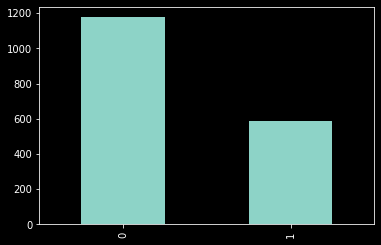

In [160]:
df_test['prediction'].value_counts().plot(kind='bar')

In [161]:
len(df_test)

1761

# Общий Вывод

Загрузила данные 

Файл Contracts:

7043 строк
Пропусков нет
Нужно поменять тип данных в стлбце TotalCharges на f

Целевым признаком является дата окончания контракта. Создала новый столбец на основе целевого признака, где отток это 1, а остольное 0. 
графики показывают что по количеству больше контракты на месяц,тип платежа-электронный чек,электронный расчётный лист,и по данным мало оттока.
По месячным тратам большинство тратятся до 25-30, но есть ещё один пик в районе 50, 70-90. По общим тратам в райое 200.
Переоброзовала признак "дата начала действия договора" в тип "year" и создала новый признак "StartYear". большые группы получились на 2014,2015,2018,2019.Большые группы и средние в 2014 и 2019 но трат больше в 2014ом.
Если посмотреть на группы больше людей предпочитают контракт на месяц. Но больше оттпка мо среднему получается у людей с контрактом на двы года.
После исл. анализа видно,что единственный признак каторый не сильно влияет на отток это 'электронный расчётный лист"

loat
Файл Internet:

5516 строк
Пр
опу


Тут можно просто увидеть о предпочтениях клиентов. Не считая стриминговое тв и фильмы, они предпочитают контракты без добавочных услуг
В большинстве случаев люди отказываются от добавочных услуг. И группы "отказников" получается больше. И по этому среднее оттока больше в этих группах. Но и немальенкое среднее оттока в группе клиентлов, каторые пользуются доп.услугами.

В столбце TotalCharges заполнила пропуски медианой, по скольку есть большые значение. В остальных столбцах заполнила наиболее часто встречающимся значением в столбце.


сков нет
Файл Personal:

7043 строк

После исследования видно что важную роль играет признак " есть ли у абонента супруг или супруга". По среднему целевого признака больше оттока есть у клиентов с парами.

Пропусков нет
Файл Phone:

В основном предпочитаю связь без добавочных линии.

Соединила таблицы. Заполнила пропуски с помощю imputer-а,most_frequent для категориальных данных, 0 для непрерывных данных. После соединения изучила данные. 
Пропусков нет

Подгатовила данные для пайплайна. В пайплайне использовала пять моделей DecisionTreeClassifier,KNeighborsClassifier,LogisticRegression и RandomForestClassifier, CatBoostClassifier. Использовала randomized_search с метрикой roc_auc. На трен данных лучшая модель - CatBoostClassifier, метрика roc_auc получила 0.82. Модель сохранила в переменной catboost_model.


На тестовой выборке roc_auc-0.85. Тут нам важен recall, по скольку нам важно что бы модель правильно угадала отточного клиента. У модели recall-0.8.


Первое место по важности у нового признака "Длительность контракта".


По общей картинке видим, что в основном отточники с контрактом 2014г-а. В большинстве случаев контракт заключён на 2 года, Месячная трата в районе 100,В основном пары. Пользуются из интернет услуг  стрим. тв и фильмы, зашита. 

Как вывод думаю, что это клиенты каторые давно заключили контракт и думаю в это время не было ни каких обновлении на акции или индивидульные скидки для постоянных клиентов. Это хорошо когда добовляются новые клиенты. Но думаю с постоянными клиентами нужен индивидуальный подход. По скольку добавочные услуги не все подключают, можно сделать акцент на доп. услуги. Сделать акции или добавить новвые пакеты с услугами всё включено с индивидуальным расчётом.



<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора V1:
</b> Молодец, хорошая работа! Давай исправим пару моментов:<br>
    1. Стоит удалить временной признак года начала(вместо него лучше посчитать длительность контракта)<br>
    2. Заполнение пропусков в TotalCharges<br>
    3. Пути к файлам<br>
    4. Список численных признаков в пайплайне и ошибка в sparse_output <br>
    5. Некорректная метрика при подборе гиперпараметров<br>
    6. confusion_matrix и анализ важности признаков<br>
    7. ROC-кривая итоговой модели<br>
    Также корреляцию лучше смотреть для объединенной выборки после заполнения пропусков. Кроме того не понятно зачем нужен анализ данных для предсказанных значений
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора V2:
</b> Хорошо,осталось исправить пару моментов:<br>
    1. Расчет длительности контракта(добавил пример), не забудь подправить в пайплайне список численных признаков<br>
    2. Анализ важности признаков(посмотри ссылки в пачке) <br>
    Также в phik в interval_cols стоит указывать только численные признаки, матрицу корреляции лучше смотреть для объединенной выборки, для каждого датафрейма смотреть не обязательно. Для достижения нормальной метрики стоит использовать бустинговые модели(например CatboostClassifier).

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Совсем итоговый комментарий, персональная обратная связь и рекомендации:
</b>Отлично! Ты справилась! Молодец, что используешь shap! Поздравляю с окончанием обучения!
    Что можно улучшить:<br> 
    1. PEP-8(особенно импорты), старайся не дублировать код<br>
    2. Стоит провести рефакторинг кода, некоторые строки кода бесполезны(phik_overview.info()), некоторые выводы устарели<br>
    3. Heatmap корреляции лучше выводить с коэффициентами<br>
    4. Графики лучше делать в зависимости от таргета, так информативнее. Для категориальных признаков посмотри использование sns.countplot(с параметром hue)
    <br>
    5. Советую подробнее изучить  <a href = "https://habr.com/ru/articles/712080/">пайплайны</a><br><a href = "https://towardsdatascience.com/how-to-tune-multiple-ml-models-with-gridsearchcv-at-once-9fcebfcc6c23">тык</a><br>
    6. Почитай про <a href = "https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/">Overfitting и Underfitting</a><br>
    7. Советую почитать про <a href = "https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html"?>BayesSearchCV</a> и Optuna<br>
    8. Советую почитать про уменьшение размерности в ML, например про <a href = "https://habr.com/ru/articles/304214/">pca для снижения размерности</a><br>
    10. Стоит подробнее почитать про <a href = "https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b">мультиколлинеарность</a>,  Cramer's V.Также советую для корреляционных матриц смотреть на стат.значимость коэффициентов<br>
    11. Можешь почитать про feature selection<a href = "https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/">Тык</a><br>
    12. Советую изучить <a href = "https://habr.com/ru/articles/594077/">кэтбуст</a> со встроенными методами, также почитай про тюнинг кэтбуста <a href = "https://github.com/catboost/tutorials/blob/master/hyperparameters_tuning/hyperparameters_tuning_using_optuna_and_hyperopt.ipynb">тык</a> <br>
    13. По поводу утечек можешь почитать <a href = "https://machinelearningmastery.com/data-preparation-without-data-leakage/">тут</a><br>
    15. Советую почитать про <a href= "https://neptune.ai/blog/lightgbm-parameters-guide">lightgbm</a> <br>
    16. Для деревянных/бустинговых моделей данные можно не масштабировать<br>
    17. Для бустинговых  моделей моделей лучше использовать встроенные кодировщики, для кэтбуста настоятельно не рекоммендуется использовать <a href = "https://catboost.ai/en/docs/features/categorical-features">OHE</a><br>
    18. Для бустинговых моделей лучше использовать встроенные кодировщики<br>
    Успехов в дальнейшей карьере DS!
   </div>